<a href="https://colab.research.google.com/github/Lfirenzeg/msds602labs/blob/main/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 9**

In [1]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library

In [2]:
# Load datasets here once and assign to variable iris

iris = pd.read_csv("https://raw.githubusercontent.com/Lfirenzeg/msds602labs/refs/heads/main/Iris.csv")


**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [3]:
# To return the first 5 rows of the dataset:
print("First 5 rows of the Iris dataset:")
print(iris.head())

# Since the 'Species' column is the only categorical variable
# we can use it as the target column
target_names = iris['Species'].unique().tolist()

print("\nTarget Names List:")
print(target_names)

First 5 rows of the Iris dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Target Names List:
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [4]:
# X will be assigned to the features and y is the target column (like in the previous question)
X = iris.iloc[:, 1:-1]  # Features: SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm
y = iris['Species']     # target column

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=85)

# Fitting kNN Model
k = 5      # 5 provides a good balance, as it considers multiple neighbors,
            # reducing the risk of overfitting, but is not too large, avoiding underfitting
knn = KNN(n_neighbors=k)
knn.fit(X_train, y_train)

# Creating predictions in new_observations argument
new_observations = [
    [4.8, 3.2, 1.3, 0.3],  # Likely Iris-setosa (small petal length/width, wider sepals)
    [5.9, 2.8, 4.2, 1.3],  # Likely Iris-versicolor (moderate petal length/width)
    [6.8, 3.0, 5.8, 2.2],  # Likely Iris-virginica (large petal length/width)
    [4.5, 2.3, 1.4, 0.2],  # Likely Iris-setosa (small dimensions overall)
    [6.4, 2.9, 4.5, 1.5]   # Likely Iris-versicolor (moderate features)
]

# Predicting the category of new observations
predictions = knn.predict(new_observations)

# Print Predictions
print("\nPredicted Species for new_observations:")
for i, pred in enumerate(predictions):
    print(f"Observation {i+1}: {pred}")



Predicted Species for new_observations:
Observation 1: Iris-setosa
Observation 2: Iris-versicolor
Observation 3: Iris-virginica
Observation 4: Iris-setosa
Observation 5: Iris-versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [5]:
# We can start by defining a function to split the data, train the model, generate the prediction,
#  and return the accuracy score based on the ratio of correct/incorrect predictions from the boolean array
def knn_accuracy(split=0.2, neighbors=5):  #we pass traditional default values in case no values are provided
    """
    Split the Iris dataset into training and testing sets, fit a kNN model,
    and return the accuracy score using test data.

    Parameters:
    split (float): Test size ratio (default = 0.2).
    neighbors (int): Number of neighbors for kNN (default = 5).

    Returns:
    float: Accuracy score on the test data.
    """
    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = tts(X, y, test_size=split, random_state=99)

    # Training the kNN Model
    knn = KNN(n_neighbors=neighbors)
    knn.fit(X_train, y_train)

    # Predict the test set
    y_pred = knn.predict(X_test)

    # Calculate and return the accuracy score based on the boolean array true/false ratio
    accuracy = np.mean(y_pred == y_test)
    return accuracy

# We can change these values to test the function
split_ratio = 0.4  # 40% test data
n_neighbors = 6    # kNN with 6 neighbors

# Calling the function and printing the accuracy
accuracy_score = knn_accuracy(split=split_ratio, neighbors=n_neighbors)
print(f"\nAccuracy of kNN model with split={split_ratio} and neighbors={n_neighbors}: {accuracy_score:.2f}")



Accuracy of kNN model with split=0.4 and neighbors=6: 0.97


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

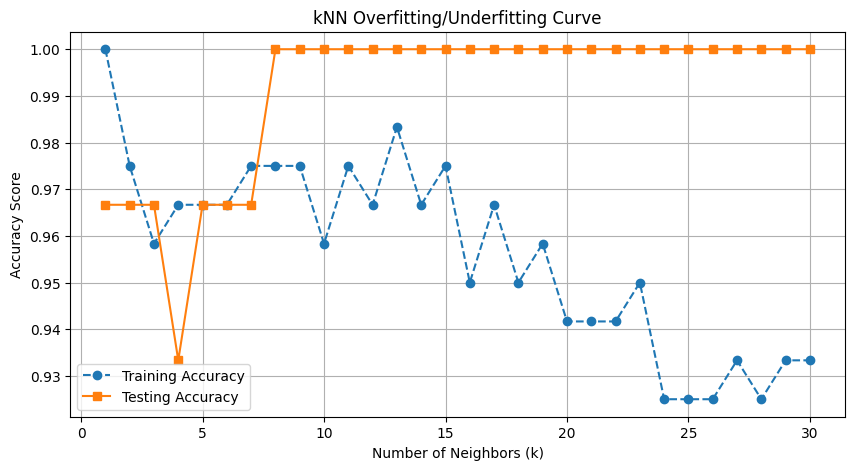

In [12]:
# We'll create lists that will stores the scores to later plot them, and set a loop
# so that the model will run through the range of k values provided, and store the resulting scores

# Initializing lists that will store accuracy scores for training and testing
training_accuracies = []
testing_accuracies = []

# Setting the range of k values, in this case from 1 to 30
k_values = range(1, 31)

# Loop through k values and calculate accuracies
for k in k_values:
    # Start kNN model with the current k value
    knn = KNN(n_neighbors=k)

    # Fit the model to the training data
    knn.fit(X_train, y_train)

    # Predict on both training and testing sets
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate accuracy scores
    train_acc = np.mean(y_train_pred == y_train)  # Training accuracy shows how well the model fits the training data.
    test_acc = np.mean(y_test_pred == y_test)     # Testing accuracy shows how well the model generalizes to new data

    # Store the scores in previously initialized lists using append
    training_accuracies.append(train_acc)
    testing_accuracies.append(test_acc)

# Plot the overfitting/underfitting curves
plt.figure(figsize=(10, 5))
plt.plot(k_values, training_accuracies, label='Training Accuracy', linestyle='--', marker='o')
plt.plot(k_values, testing_accuracies, label='Testing Accuracy', linestyle='-', marker='s')

# Customizing the plot
plt.title('kNN Overfitting/Underfitting Curve') #add title
plt.xlabel('Number of Neighbors (k)') #add labels for X
plt.ylabel('Accuracy Score') #add label for Y
plt.legend(loc='best')
plt.grid(True)
plt.show()


What do we see in the plot?
- Is quite interesting that after k = 7, the testing accuracy stabilizes at around 1.0 (100%), which is unusually high, this could indicate a very "clean" dataset with well-separated classes.
- Also, since the Iris dataset is relatively small and well-structured, with classes that are clearly separable, the plot shows that even with larger k values, the model can still predict the test set perfectly.
